Importing packages

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import rawpy
import imageio
import numpy as np

Function swap_channels takes rgb matrix and indices of two channels(x,y) to swap. Returns newly created rgb matrix

In [2]:
def swap_channels(rgb, x, y):
    res = rgb.copy()
    x_val = res[:,:,x].copy()
    y_val = res[:,:,y].copy()
    res[:,:,x] = y_val
    res[:,:,y] = x_val
    
    return res

calculate_ndvi - NDVI calculation from rgb matrix

In [3]:
def calculate_ndvi(rgb):
    maxval=np.max(np.max(np.max(rgb)))
    
    bd=255
    if maxval>255:
         bd= 2**16-1
            
    gamma = 2.2
    red = rgb[:, :, 0].copy()
    gain = 2
    red = gain * (red / bd)**gamma
    blue = rgb[:, :, 2].copy()
    blue = (blue / bd)**gamma
    diff = red - blue
    sum_ = blue + red
    
    return np.divide(diff, sum_, out=np.zeros_like(diff), where=sum_!=0)

calculate_lai - LAI calculation from NDVI

In [4]:
def calculate_lai(ndvi):
    return 0.57 * np.exp(2.33 * ndvi)

display_ndvi - Plotting of Ndvi matrix

In [5]:
def display_ndvi(ndvi, save_path=None):
    plt.matshow(ndvi, vmin=-1, vmax=1, cmap=plt.cm.jet)
    plt.title("NDVI")
    plt.colorbar()
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [6]:
def display_lai(lai, save_path=None):
    plt.matshow(lai, vmin=-1, vmax=1, cmap=plt.cm.jet)
    plt.title("LAI")
    plt.colorbar()
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [7]:
def display_spectogram(x, image_name, save_path=None):
    plt.specgram(x)

display_image - Plotting image from rgb matrix

In [8]:
def display_image(rgb):
    plt.imshow(rgb)
    plt.show()

log_median_rgb - prints channels mean value

In [9]:
def log_median_rgb(rgb):
    def log_channel_median(i, channel_name):
        print(f"{channel_name} median value - {np.median(rgb[:, :, i])}")
        
    log_channel_median(0, "Red")
    log_channel_median(1, "Green")
    log_channel_median(2, "Blue")

display_ndvi_specgram - plotting ndvi spectogram

In [10]:
def display_ndvi_specgram(ndvi, image_name, save_path = None):
    plt.specgram(ndvi.flatten(), Fs=1, vmin=-1, vmax=1)
    plt.title(f"Spectogram of {image_name} NDVI")
    if save_path:
        plt.savefig(save_path)
    plt.show()

display_ndvi_psd - displaying psd for ndvi

In [11]:
def display_ndvi_psd(ndvi, image_name, save_path = None):
    plt.psd(ndvi.flatten(), Fs=1)
    plt.title(f"Power spectral density of {image_name} NDVI")
    if save_path:
        plt.savefig(save_path)
    plt.show()

get_saving_path - Forming saving path. Used when saving script-generated images to the folder

In [12]:
def get_saving_path(folder, name, appendix, s_format = "jpg"):
    return os.path.join(folder, f"{name}_{appendix}.{s_format}")

work_through_folder - Main function, loops through the input folder, reads all .ARW images, plots image, ouput of green-blue swapping, NDVI. If  save_folder parameter was specified, saves the result to output folder

In [13]:
def work_through_folder(folder, save_folder=None):
    for root, _, files in os.walk(folder):
        for file in files:
            if '.arw' not in file.lower():
                continue
                
            path = os.path.join(root, file)
            image_name = file.split('.')[0]
            print(f"{path} - image")
            
            raw = rawpy.imread(path)
            
            rgb = raw.postprocess(use_camera_wb=True)
            swapped = swap_channels(rgb, 1, 2)
            ndvi = calculate_ndvi(rgb)
            lai = calculate_lai(ndvi)
            
            log_median_rgb(rgb)
            display_image(rgb)
            display_image(swapped)
            ndvi_save_path = None
            ndvi_spec_save_path = None
            ndvi_psd_save_path = None
            lai_spec_save_path = None
            
            if save_folder:
                rgb_name = get_saving_path(save_folder, image_name, "rgb")
                plt.imsave(rgb_name, rgb)
                swapped_name = get_saving_path(save_folder, image_name, "swap")
                plt.imsave(swapped_name, swapped)
                ndvi_save_path = get_saving_path(save_folder, image_name, "ndvi", "png")
                ndvi_spec_save_path = get_saving_path(save_folder, image_name, "ndvi_spectogram", "png")
                ndvi_psd_save_path = get_saving_path(save_folder, image_name, "ndvi_psd", "png")
                lai_spec_save_path = get_saving_path(save_folder, image_name, "lai", "png")
                
            display_ndvi(ndvi, ndvi_save_path)
            display_lai(lai, lai_spec_save_path)
            display_ndvi_specgram(ndvi, image_name, ndvi_spec_save_path)
            display_ndvi_psd(ndvi, image_name, ndvi_spec_save_path)

Modification of input and output folders

In [14]:
DATA_FOLDER = "RAW/"
SAVE_FOLDER = "script_output/"

RAW/DSC03774.ARW - image
Red median value - 126.0
Green median value - 88.0
Blue median value - 119.0


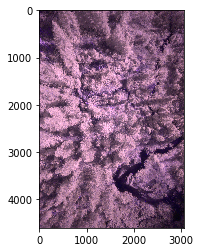

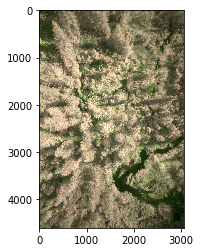

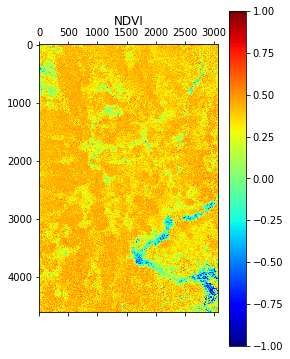

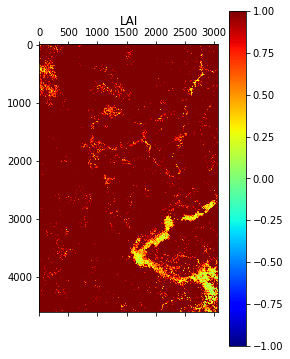

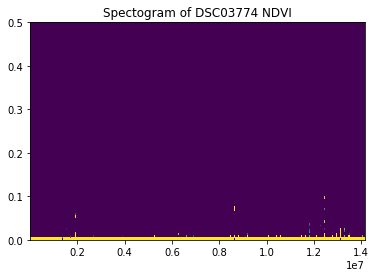

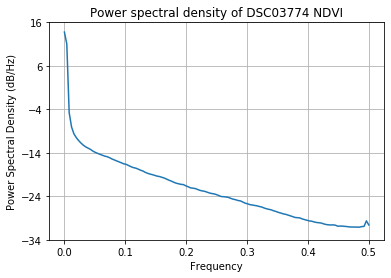

RAW/DSC03781.ARW - image
Red median value - 124.0
Green median value - 85.0
Blue median value - 121.0


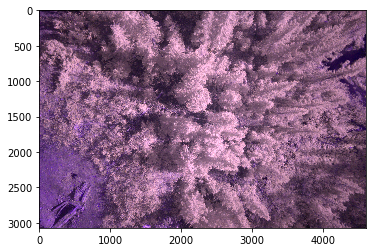

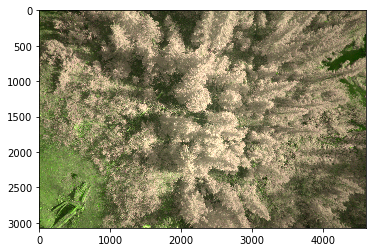

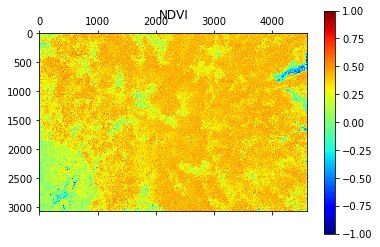

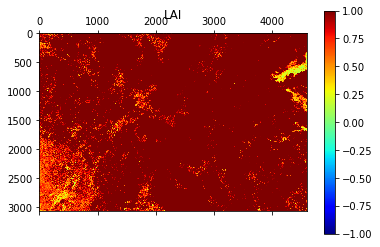

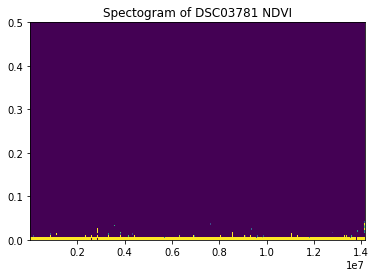

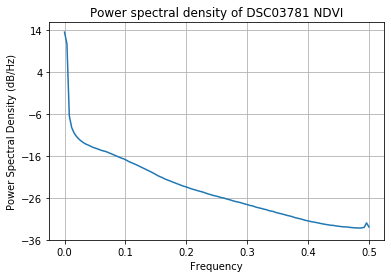

RAW/DSC03833.ARW - image
Red median value - 117.0
Green median value - 43.0
Blue median value - 65.0


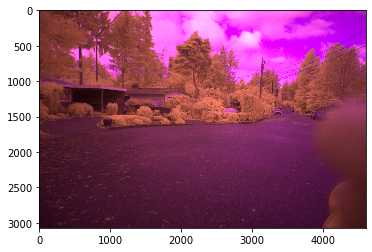

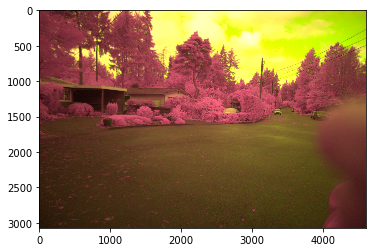

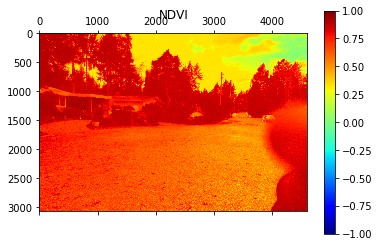

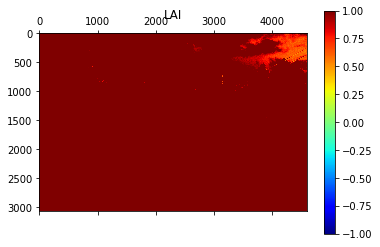

C:\Users\nazar\.conda\envs\aci_ndvi\lib\site-packages\matplotlib\axes\_axes.py:7739: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


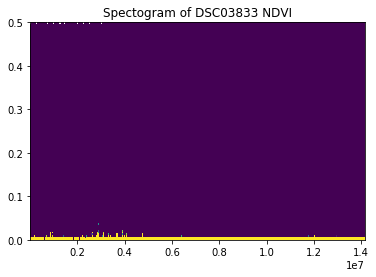

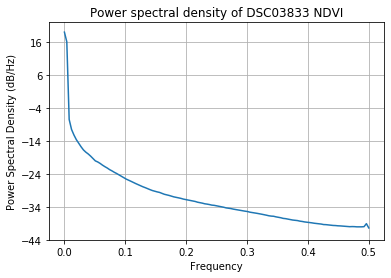

RAW/DSC03945.ARW - image
Red median value - 111.0
Green median value - 49.0
Blue median value - 45.0


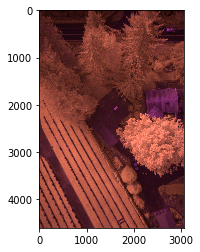

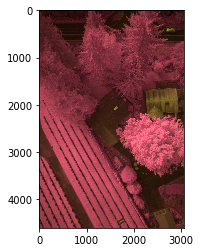

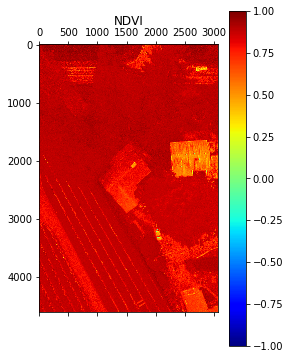

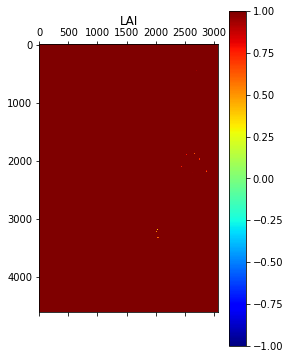

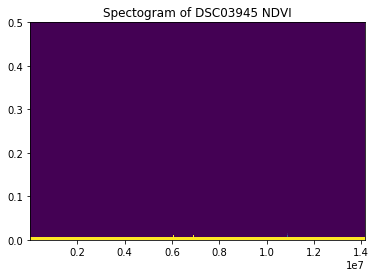

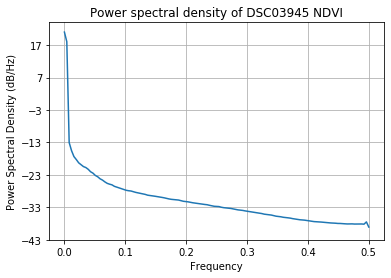

RAW/DSC03946.ARW - image
Red median value - 134.0
Green median value - 62.0
Blue median value - 56.0


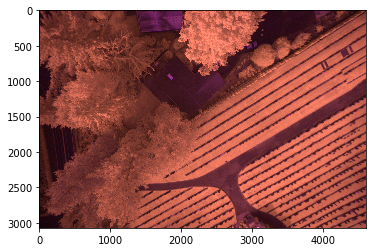

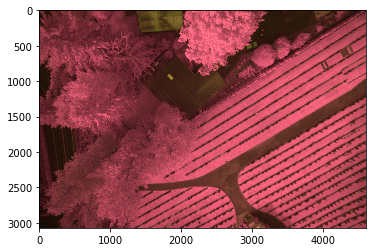

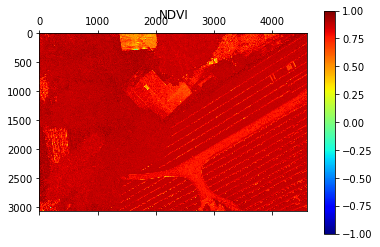

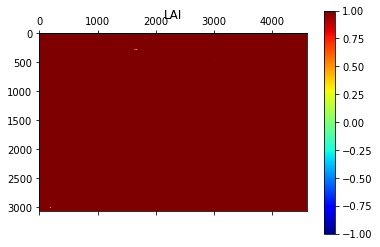

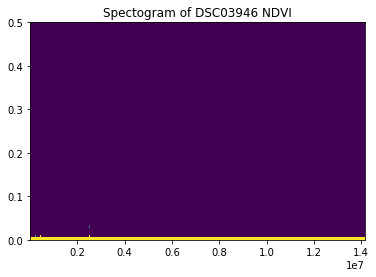

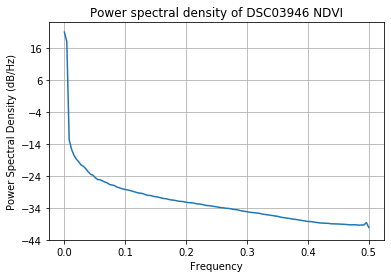

RAW/DSC03949.ARW - image
Red median value - 126.0
Green median value - 57.0
Blue median value - 53.0


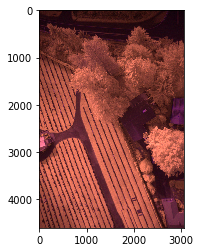

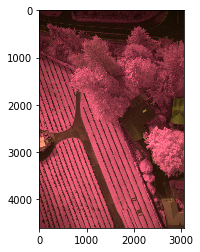

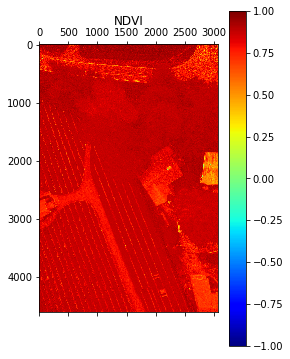

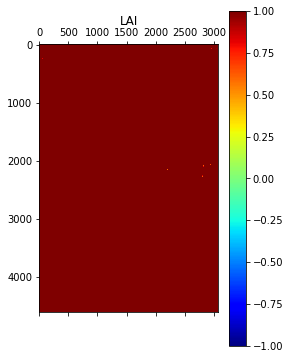

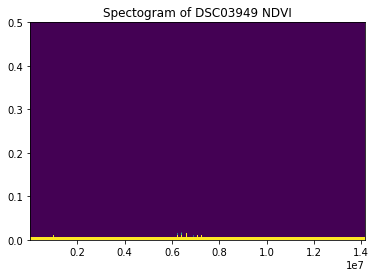

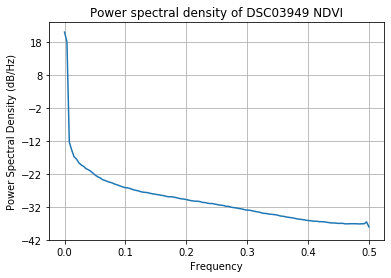

RAW/DSC03950.ARW - image
Red median value - 120.0
Green median value - 54.0
Blue median value - 52.0


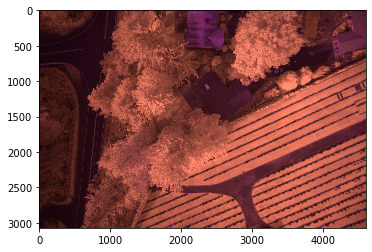

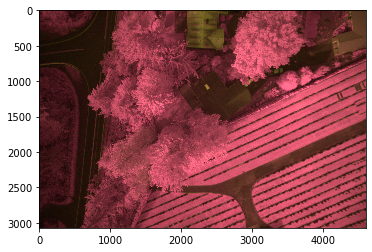

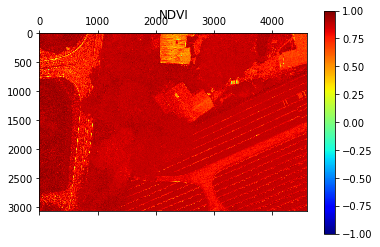

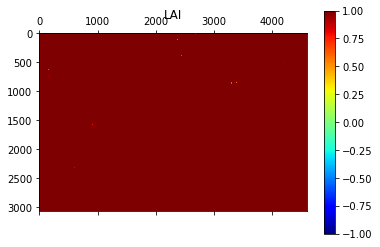

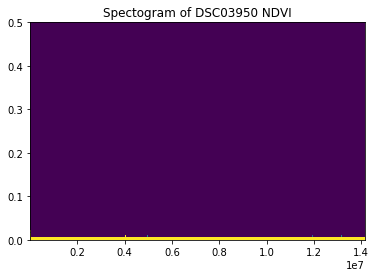

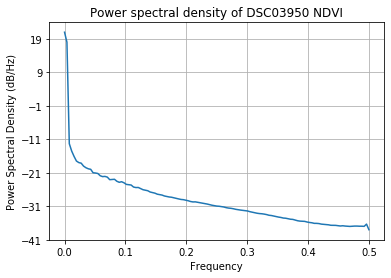

RAW/DSC03951.ARW - image
Red median value - 117.0
Green median value - 53.0
Blue median value - 49.0


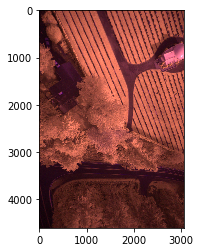

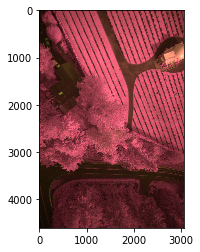

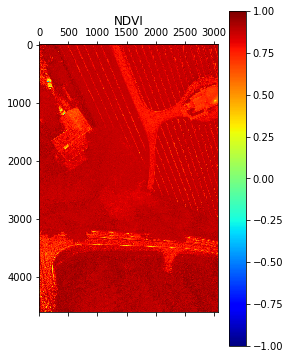

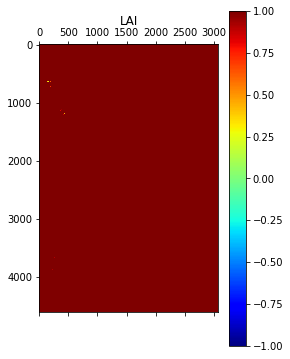

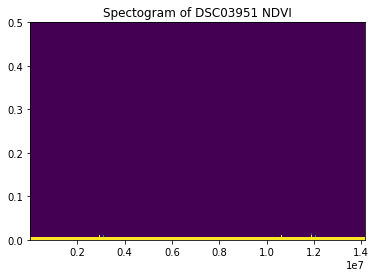

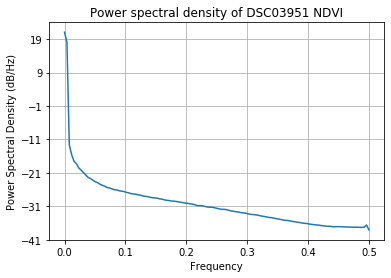

RAW/DSC03952.ARW - image
Red median value - 113.0
Green median value - 50.0
Blue median value - 47.0


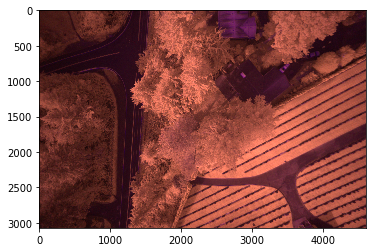

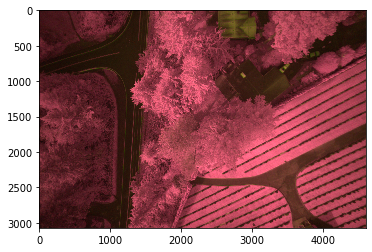

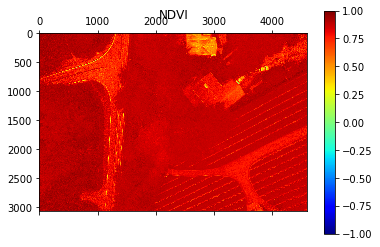

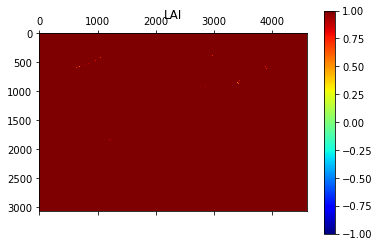

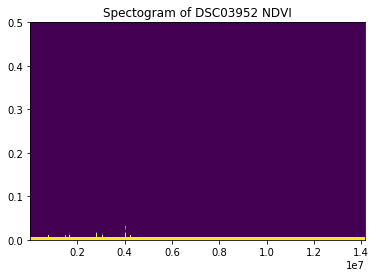

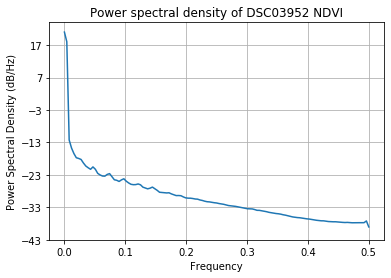

RAW/DSC03953.ARW - image
Red median value - 113.0
Green median value - 50.0
Blue median value - 46.0


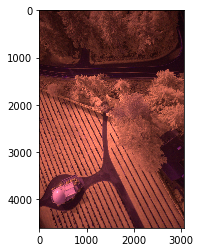

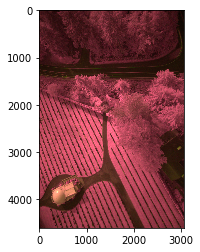

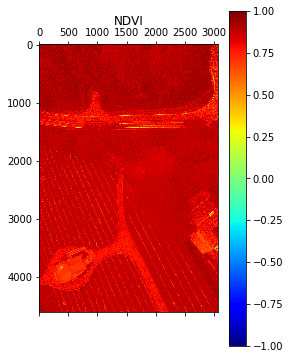

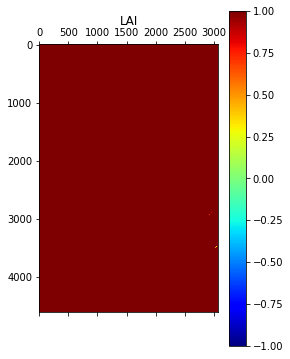

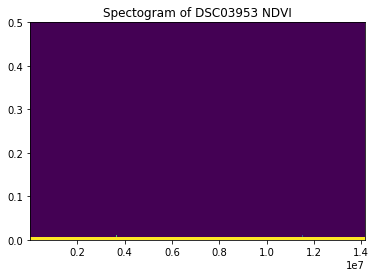

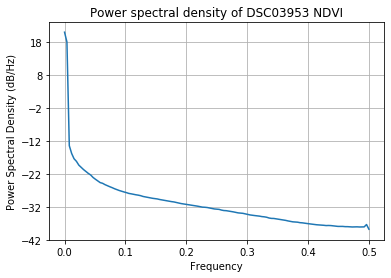

RAW/DSC03972.ARW - image
Red median value - 159.0
Green median value - 76.0
Blue median value - 67.0


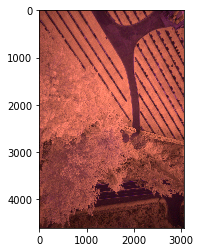

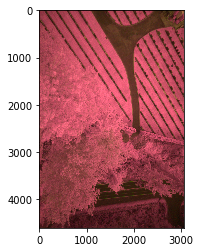

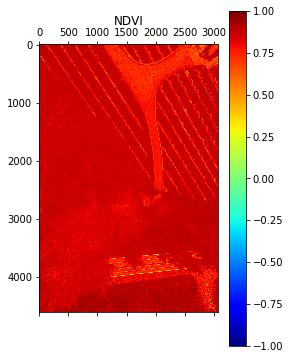

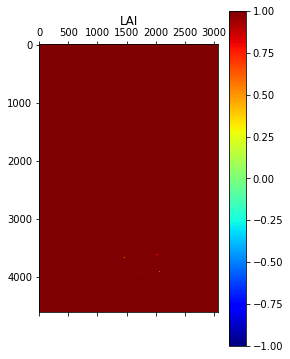

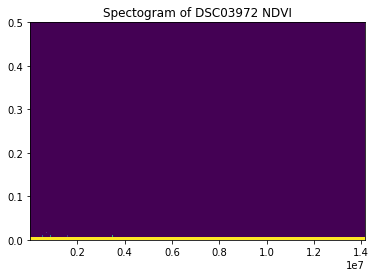

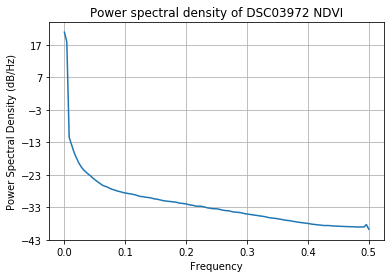

In [15]:
work_through_folder(DATA_FOLDER, SAVE_FOLDER)